# Automatic Differentiation Documentation

Group 24: Jessica A Wijaya, Shujian Zhu, Malik Wagih, William Palmer

# 1. Introduction
Evaluation of derivatives is integral to many machine learning methods. For this purpose, two main methods could be used: symbolical and numerical differentiation. Symbolical differentiation, though straightforward, its implementation requires complex expression manipulation in computer algebra systems, making it very costly to evaluate; the method is also limited to closed-form input expressions. On the other hand, numerical differentiation computes the function derivative by approximating it using small values of step size h; though numerical simpler and faster than symbolic diffferentiation, it suffers from stability issues and round-off or truncation errors.

To address the weaknesses of both these methods, Automatic Differentiation (AD) was introduced. Since, it has been applied in different areas, such as  engineering design optimization, structural mechanics, and atmospheric sciences; its application to machine learning methods popularised AD. Therefore, due to the important role AD plays in many scientific fields, we introduce a python package that provides user-friendly methods for performing forward-mode AD. Our package supports the evaluation of first derivatives of functions defined by user at given input value. 

In addition, we also developed an additional tools that leverages the Automatic Differentiation functionality, the root-finding tool and the gradient descent tool. Sometimes we are faced with equations where the closed-form solution does not exist or the underlying function is too complex. In these cases where analytical solution is not possible, we can rely on some numerical methods, such as the Newton-Rhapson's methods, Secant method, etc. In this package, we include a root-finder tool that supports several algorithms, including the Newton's methods, Broyden method, and Secant method. While some algorithms (e.g. Broyden and Secant method) does not rely on Automatic Differentation, some of the most popular methods (i.e. Newton-Rhapson's method, esp in its application for neural networks) heavily rely on assessing the derivative of the function at a series of points to find the local/global optima. This is where the functionality of Automatic Differentiation comes in handy. We will demonstrate the use of Automatic Differentation (AD) in this tool. Also, Gradient Descent leverages the Automatic Differentiation for a number of applications where a minimum or maximum of a function needs to be found whether it is minimizing a loss function for a machine learning problem or maximizing the log likelihood for statistics application.

# 2. Background

## 2.1 Automatic Differentiation

All numerical computation can be seen as a combination of elementary operations for which the derivatives are known. The derivatives of the overall composition can be found by combining the derivatives of elementary operations through the chain rule. Such elementary functions include arithmetic operations (addition, subtraction, multiplication, division), sign switch, and functions such as exponential, logarithm, and the trigonometric (e.g. sin(x), cos(x)). Traces of these elementary operations can be represented by a trace table or a computational graph. Trace table are originally used to trace the value of variables as each line of code is executed. As an example of this flow, Table 1 shows the evaluation trace of elementary operations of the computation f(x<sub>1</sub>) = ln(x<sub>1</sub>) + 3 * x<sub>1</sub> and Figure 1 gives an example of a graphic representation of function f(x<sub>1</sub>) by its elementary operations. 

<p style="text-align: center;"> Table 1: Evaluation Trace for a sample function</p>


| Trace       | Elementary function | Current Function Value | Function Derivative |
| ------------- |:-------------:|:-------------:|:-------------:|
| X1      | X1            |  c             | 1  |
| X2      | ln(X1)            | ln(c)      | 1/c |
| X3      | 3 * X1            |  3c        | 3   |
| X4      | X2 + X3             | ln(c) + 3c | 1/c + 3 |

![alt text](images/sample_trace_graph.png "Figure 1")
<p style="text-align: center;"> Figure 1: Graphic representation of elementary functions sequence of a function </p>

### 2.1.1 Forward Mode

The forward mode of AD starts from the input value and compute the derivative of intermediate variables with respect to the input value. Applying the chain rule to each elementary operation in the forward primal trace, we generate the corresponding derivative trace, which gives us the derivative in the final variable. Forward mode AD can also be viewed as evaluating a function using dual numbers, which are defined as $a+b\epsilon$, where $a, b \in \mathbf{R}$ and $\epsilon$ is a nilpotent number such that $\epsilon^2 = 0$ and $\epsilon \neq 0$. It can be shown that the coefficient of $\epsilon$ after evaluating a function is exactly the derivative of that function, which also works for chain rule.

The Forward mode can be considered as the computation of the Jacobian-Vector product. Given $F : R^n → R^m$ and the Jacobian $J = DF(x) ∈ R^{m×n}$.

![Figure 2](images/JacobianMatrix.png)

One sweep of the <span style="color:blue"> forward mode </span> can calculate one column vector of the Jacobian, <span style="color:blue"> $J \hat{x} $ </span>, where $ \hat{x} $ is a column vector of seeds. In comparison, one sweep of the <span style="color:red"> reverse mode </span> can calculate one row vector of the Jacobian, <span style="color:red"> $\overline{y} J $ </span>, where $ \overline{y} $ is a row vector of seeds. This is why the <span style="color:blue"> forward mode </span> is very efficient to compute $F : R → R^m$, while the <span style="color:red"> reverse mode </span> best suited to compute $G : R^m → R$. While the efficiency of each sweep for the forward and reverse mode is the same, the reverse mode requires access to intermediate variables thereby needing more memory, while forward mode does not come with this baggage. 


## 2.2 Root-Finding Algorithm

The root-finding problem is one of the most important computational problems. It arises in a wide variety of practical applications in physics, chemistry, biosciences, engineering, etc. In fact, determination of any unknown appearing implicitly in scientific or engineering formulas gives rise to a root-finding problem. 

The solution to this problem is pretty straighforward, which is to find the point where the function equal to 0. However in reality, this does not always work because the analytical expression of the function may not exist. This is true for even commonly arising polynomial functions. A polynomial P<sub>n</sub>(x) of degree n has the form: $P_{n}(x) = a_{0} + a_{1}x + a_{1}x^2 + ... + a_{n}x^n $ The Fundamental Theorem of Algebra states that a polynomial P<sub>n</sub>(x) of degree n (n ≥ 1) has at least one zero. To solve a quadratic equation: $P_{2}(x) = ax^2 + bx + c$
using the analytical formula: 

$$ x = \frac {−b ± \sqrt{b^2 - 4ac}}{2a}$$

Nevertheless, for polynomials of degree 5 or greater, such analytical formulas do not exist. Hence, most computational methods for the root-finding problem have to be iterative in nature. There are several common numerical methods to help estimate the roots, such as the Newton's method and Secant/Broyden's method. See section 7 below for deeper discussion on the mathematical background of each ot these methods and the pros and cons of each.


# 3. Installation
Th package uses a setup.py file for a simple installation, you need to to run the following command in the package main folder:


`pip install .`

# 4. How to Use AutoDiff 
In this section, we demo the the AutoDiff package and its capabilities. First, we need to import AutoDiff (as demonstrated below) before using the functions.

In [1]:
import AutoDiff as ad
from AutoDiff import root_finding as rt
from AutoDiff import gradient_descent

#### 4.1 Single variable input function with scalar input value

Suppose we have a function of interest and that we would like to evaluate the value and derivative at some specific point. To do that, we can use the following procedure:

1. First, we need to declare the function of interest. The AutoDiff package support two different ways to do this:

    1. **Pass the function to AD_eval()**

      <p>We can pass the function as string to `AD_eval` using the function definition below:<br>
    <code>AD_eval(function:str, variable_label:str<sup>1</sup>, variable_value:float<sup>1</sup>)</code></p>

      <p>The inputs are below:</p>

      - **Function of interest <*string*>:** The function has to be passed in as a string in the form that python would be able to run (e.g. using `*` for multiplication, using `**` for power, etc.) For example, if the function is $f(x) = 3x^2$, the user has to pass it as `'3*x**2'`<br>
    
      - **Variable label(s) <*string<sup>1</sup>*>:** This is the variable for which the function derivative will be calculated in respect to, passed in as a string, e.g. 'x' or 'y'. Normally, this variable is expected to be contained in the function passed in earlier (otherwise, the function is then just a constant, with a derivative of 0).<br>

      - **Variable value(s) <*float<sup>1</sup>*>:**The package will then compute the function value and the derivative when the variable is equal to this value <br>
      
      <sup>1</sup> Note that for function with multiple variables, the user has to pass in the variable label(s) as a list of strings (e.g. `['x', 'y']` or `['x1', 'x2', 'x3']`) and the variable value(s) as a list of floats for each of the variables respectively, (e.g. `[2,3]` or `[1,2,3]`). Note that the list passed in for variable label(s) and for variable value(s) has to be of the same size. <br><br>

    2. **Create an AD_Object()**
    
    <p>Alternatively, we can declare a variable `x` or `y` as part of the function of interest, by initializing the variable as AD_Object like below, 
    <code>AD_object(variable_value:float, variable_label:string)</code><br>
    This AD_object will store the function value and derivative value with each subsequent elementary operation. Everytime we perform an operation on this AD_object, the resulting function will be another AD_object with an updated function value and derivative value. <br> The procedure is as follows:</p>
     
     - Create the variable as AD_object using the following inputs:
     
        - **Variable label <*string*>:** This is the variable for which the function derivative will be calculated in respect to, passed in as a string, e.g. 'x' or 'y'. Normally, this variable is expected to be contained in the function passed in earlier (otherwise, the function is then just a constant, with a derivative of 0).
        - **Variable value <*float*>:** The package will then compute the function value and the derivative when the variable is equal to this value 
        
     - Create another variable, say `y`, as the function of interest, e.g. `y = f(x) = -x**3 + 2*x**2 + 3*x + 5` <br><br>
          
2. Call `.val` to get the value of the function, e.g. $f(x=2)$ <br><br>
3. Call `.der` or `.derivative('x')` to get the value of the derivative, e.g. $\frac{df}{dx}_{|x=2}$.

    Note that <code>.derivative('x')</code> will return the value of the derivative w.r.t. <code>'x'</code> as an integer/float, while <code>.der</code> will return the derivative in the form of dictionary (the keys being all variable labels passed by the user).
    

**Example 1:** 

Consider the function $f(x) = -x^3 + 2x^2 + 3x + 5$, and we are trying to evaluate the value and derivative of at $x = 2$.

Using the first approach to declare the function of interest, i.e. pass the function as string to AD_eval():

In [2]:
y = ad.AD_eval("-x**3 + 2*x**2 + 3*x + 5", "x", 2)

print("val: ", y.val)
print("der: ", y.der)
print("der:",y.derivative('x'))
print(y)

val:  11
der:  {'x': -1}
der: -1
AD Object: Value = 11.000, Derivative: d(x)= -1.000 ; 


Using the second approach to declare the function of interest, i.e. create an AD_Object():

In [3]:
x = ad.AD_Object(2, 'x')
y = -x**3 + 2*x**2 + 3*x + 5
print("val: ", y.val)
print("der: ", y.der)
print("der: ", y.derivative('x'))
print(y)

val:  11
der:  {'x': -1}
der:  -1
AD Object: Value = 11.000, Derivative: d(x)= -1.000 ; 


<strong>Example 2:</strong>

Consider the function $f(x) = sin(x)$, and we are trying to evaluate the value and derivative of at $x = 0$

Using the first approach to declare the function of interest, i.e. pass the function as string to AD_eval():

In [4]:
## Elementary function example  
y = ad.AD_eval('sin(x)', 'x', 0)
print("val: ", y.val)
print("der: ", y.der)
print("der: ", y.derivative('x'))
print(y)

val:  0.0
der:  {'x': 1.0}
der:  1.0
AD Object: Value = 0.000, Derivative: d(x)= 1.000 ; 


Using the second approach to declare the function of interest, i.e. create an AD_Object():

In [5]:
x = ad.AD_Object(0, 'x')
y = ad.sin(x)
print("val: ", y.val)
print("der: ", y.der)
print("der: ", y.derivative('x'))
print(y)

val:  0.0
der:  {'x': 1.0}
der:  1.0
AD Object: Value = 0.000, Derivative: d(x)= 1.000 ; 


### 4.2 Multiple variable input function with scalar input values 

We can use similar fashion to declare the functions and get the value of the function and derivative, with small tweaks in the way the variable labels and variable values are passed in. We can use the following procedures:


1. First, we need to declare the function of interest in the same way as before, using one of these 2 options:

    1. **Pass the function as string to AD_eval()**
    <code>AD_eval(function:str, variable_label:list, variable_value:list)</code></p>
      We can do this similarly like before, except that we need to passed in the variable labels and values as list of string and list of floats. We can pass the function as string to `AD_eval` using the function definition below:=

      - **Function of interest <*string*>:** The function has to be passed in as a string in the form that python would be able to run (e.g. using `*` for multiplication, using `**` for power, etc.) For example, if the function is $f(x) = 3x^2 + 2y $, the user has to pass it as `'3*x**2 + 2*y '`<br>
    
      - **Variable label(s) <*list*>:** These are the variable(s) for which the function derivative will be calculated in respect to, passed in as a list of strings, e.g. `['x', 'y']` or `['x1', 'x2', 'x3']`. <br>

      - **Variable value <*list*>:** The function value and the derivative will be calculated when the variable(s) are equal to these values respectively, passed in as a list of floats, e.g. `[2,3]` or `[1,2,3]`. Note that the list passed in for variable label(s) and for variable value(s) has to be of the same size. <br>
      
    2. **Create an AD_Object()**
    
    <p>Alternatively, we can declare the variables as part of the function of interest by initializing each of them as AD_Object separately, using the function definition below.  
    <code>AD_object(variable_value:float, variable_label:string)</code><br> This part of the procedure is exactly the same as with input function with single variable, except that we need to initialize the AD_object for <code>n</code> many times if we have <code>n</code> different variables in the input function. <br> The procedure is as follows: </p>

          
2. Call `.val` to get the value of the function, e.g. $f(x=2, y=3)$ <br><br>
3. To get the value of the partial derivative(s), there are 2 ways:<br>
    1. Call `.der` to get the value of the partial derivatives w.r.t. each and every single variables that were passed in earlier, or <br>
    2. Call `.derivative('x')` or `.derivative('y')` to get the value of the partial derivative w.r.t to `x`, i.e. $\frac{df}{dx}_{|x=2}$, or `y`, i.e. $\frac{df}{dy}_{|y=3}$, respectively. 
    
    

**Example 3:** 

Consider the function $f(x) = 2x^2 + 2y^2$, and we are trying to evaluate the value and derivative of at $x = 2$ and $y = 3$:

Using the first approach to declare the function of interest, i.e. pass the function as string to AD_eval():


In [6]:
f = ad.AD_eval("2*x**2 + 2*y**2", ['x', 'y'], [2, 3])

print("val: ", f.val)
print("der: ", f.der)
print("partial derivative w.r.t. x: ",f.derivative('x'))
print("partial derivative w.r.t. y: ",f.derivative('y'))
print(f)

val:  26
der:  {'x': 8, 'y': 12}
partial derivative w.r.t. x:  8
partial derivative w.r.t. y:  12
AD Object: Value = 26.000, Derivative: d(x)= 8.000 ; d(y)= 12.000 ; 


Using the second approach to declare the function of interest, i.e. create an AD_Object():

In [7]:
x = ad.AD_Object(2, 'x')
y = ad.AD_Object(3, 'y')

f = 2*x**2 + 2*y**2

print("val: ", f.val)
print("der: ", f.der)
print("partial derivative w.r.t. x: ",f.derivative('x'))
print("partial derivative w.r.t. y: ",f.derivative('y'))
print(f)

val:  26
der:  {'x': 8, 'y': 12}
partial derivative w.r.t. x:  8
partial derivative w.r.t. y:  12
AD Object: Value = 26.000, Derivative: d(x)= 8.000 ; d(y)= 12.000 ; 


### 4.3 Vector Input Values

Vector manipulation for the input values is easy to handle, using AD_Vector to intitalize a vector of AD_Objects that perform similar to numpy arrays. The procedure is as follows: <br>
1. First, we need to initialize an AD_Vector object following this function definition: 
`AD_Vector(values: list, label:string)`
    <br>The inputs are:
    - **Variable values <*list*>:** The function value and the derivative will be calculated when the variable(s) are equal to these values, passed in as a numpy array, e.g. np.arange(1,11) for a vector array [1,10].
    
    - **Variable label(s) <*string*>:** This is the variable for which the function derivative will be calculated in respect to, passed in as string, e.g. `'x'` or `'y'`  
    
    This step can be done multiple times depending on how many variables we have in the function of interest.
    

2. Create another variable, say y, as the function of interest, e.g. $y = f(x) = x^3$

3. Call `value(y)` to get the value of the function at each point in the input vector. The function will return the function values as a list with the same length as the input vector.

4. Call `derivative(y, 'x')` to get the derivative value at each point in the input vector. The function will return the derivative values as a list with the same length as the input vector.


### 4.3.1 Single variable input function with vector input values**

**Example 4:**

Consider the function  $f(x)=x^2$ , and we are trying to evaluate the value and derivative of at $x = [1,2,...10]$:

In [8]:
import numpy as np
x = ad.AD_Vector(np.arange(1,11), label='x')
z = x**2
print(z)
print("val:",ad.value(z))
print("der:", ad.derivative(z, 'x'))

[AD Object: Value = 1.000, Derivative: d(x)= 2.000 ;
 AD Object: Value = 4.000, Derivative: d(x)= 4.000 ;
 AD Object: Value = 9.000, Derivative: d(x)= 6.000 ;
 AD Object: Value = 16.000, Derivative: d(x)= 8.000 ;
 AD Object: Value = 25.000, Derivative: d(x)= 10.000 ;
 AD Object: Value = 36.000, Derivative: d(x)= 12.000 ;
 AD Object: Value = 49.000, Derivative: d(x)= 14.000 ;
 AD Object: Value = 64.000, Derivative: d(x)= 16.000 ;
 AD Object: Value = 81.000, Derivative: d(x)= 18.000 ;
 AD Object: Value = 100.000, Derivative: d(x)= 20.000 ; ]
val: [  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]
der: [ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


### 4.3.2 Multiple variable input function with vector input values**

**Example 5:**

Consider the function  $f(x)= sin(x) + cos(y)$ , and we are trying to evaluate the value and derivative of at $x = [1,2,...10]$ and $y = [11,12,...20]$:

In [9]:
x = ad.AD_Vector(np.arange(1,11), label='x')
y = ad.AD_Vector(np.arange(11,21), label='y')
z = ad.sin(x) + ad.cos(y)
print(z)
print("\nvalue: \n", ad.value(z))
print("partial derivative w.r.t. x: \n", ad.derivative(z, 'x'))
print("partial derivative w.r.t. y: \n",ad.derivative(z, 'y'))

[AD Object: Value = 0.846, Derivative: d(x)= 0.540 ; d(y)= 1.000 ;
 AD Object: Value = 1.753, Derivative: d(x)= -0.416 ; d(y)= 0.537 ;
 AD Object: Value = 1.049, Derivative: d(x)= -0.990 ; d(y)= -0.420 ;
 AD Object: Value = -0.620, Derivative: d(x)= -0.654 ; d(y)= -0.991 ;
 AD Object: Value = -1.719, Derivative: d(x)= 0.284 ; d(y)= -0.650 ;
 AD Object: Value = -1.237, Derivative: d(x)= 0.960 ; d(y)= 0.288 ;
 AD Object: Value = 0.382, Derivative: d(x)= 0.754 ; d(y)= 0.961 ;
 AD Object: Value = 1.650, Derivative: d(x)= -0.146 ; d(y)= 0.751 ;
 AD Object: Value = 1.401, Derivative: d(x)= -0.911 ; d(y)= -0.150 ;
 AD Object: Value = -0.136, Derivative: d(x)= -0.839 ; d(y)= -0.913 ; ]

value: 
 [ 0.84589668  1.75315139  1.04856679 -0.62006528 -1.71861219 -1.23707498
  0.38182326  1.64967495  1.4008231  -0.13593905]
partial derivative w.r.t. x: 
 [ 0.54030231 -0.41614684 -0.9899925  -0.65364362  0.28366219  0.96017029
  0.75390225 -0.14550003 -0.91113026 -0.83907153]
partial derivative w.r.t. 

### 4.4. Vector Function

Vector manipulation for the input functions is implemented in a similar manner as for vector input values. We can use `AD_FuncVector` to intitalize a vector of functions. Note that each of the functions has to be based on `AD_Object`(s), i.e. we need to first create an instance of `AD_Object` (or multiple instances with `AD_Vector`) and create a function expression using on these instances. The procedure is as follows: <br>
1. First, we need to initialize an `AD_Object` object (or multiple objects using `AD_Vector`) as directed in the previous section (see section 4.1-4.2 for a scalar input using AD_Object or 4.3 for vector input), e.g. `x = AD_Object(1, 'x')` 

2. Create a new variable for `AD_FuncVector` and passed in the list of functions, following the below function definition:

    `AD_FuncVector(function: list)`
    
    The input **Functions <*list*>:** needs to be a list of function expressions using the `AD_Object` instance(s) created in the previous step.
    
    For example, we can say `y = AD_FuncVector([x+2, x^2])` where `x` is an instance of `AD_Object`.
    
3. Call `value(y)` to get the function value for each of the function in the vector. This will return the function values as a list with the same length as the number of functions in the input vector function. Note that if we use `AD_Vector` to passed in vector values, then the result will be a list of lists (the first row will be the list of values evaluated using the first function expression at each value of the vector input, the second row will be the a list of values evaluated using the second function expression at each value of the vector input, and so on)

4. Call `derivative(y, 'x')` to get the derivative value (w.r.t the variable label passed in the 2nd arg) for each of the function in the vector. This will return the derivative values as a list with the same length as the number of functions in the input vector function. Note that if we use `AD_Vector` to passed in vector values, then the result will be a list of lists (the first row will be the list of derivatives of the first function expression at each value of the vector input, the second row will be the a list of derivatives of the second function expression at each value of the vector input, and so on)

See below example for more details.

**Example 6:**

Consider the function $f(x)$ at $x=[1,2,3]$, where $f(x)$ is a vector: $$\mathbf{f(x)} = \left[\begin{array}
{r}
x-2 \\
x^2+1
\end{array}\right]
$$


In [10]:
x = ad.AD_Vector([1,2,3],'x')
f = ad.AD_FuncVector([x-2, x**2+1])

print("val:", ad.value(f))
print("der:", ad.derivative(f,'x'))


val: [[-1.0, 0.0, 1.0], [2.0, 5.0, 10.0]]
der: [[1, 1, 1], [2.0, 4.0, 6.0]]


### 4.5. Demo of Elementary Functions with Comparison Operations

**Example 7:**

Consider the sigmoid/logistic function $f(x) = \frac{1}{1+e^-x}$ at $x=[1,2,...,10]$. 

We can call `f1 = ad.sigmoid(x)`, or we can passed in the formula function manually `f2 = 1/(1 + ad.e(-x))`. These 2 approaches should be equal.

In [11]:
print('f1 = sigmoid(x)')
x = ad.AD_Object(1, label='x')
f1 = ad.sigmoid(x)
print(f1)

print('\nf2 = 1/(1 + exp(-x))')
f2 = 1/(1 + ad.e(-x)) #remember to call the function as ad.e(x) instead of ad.exp()
print(f2)

print('\nf1 equal to f2?', (f1==f2))

f1 = sigmoid(x)
AD Object: Value = 0.731, Derivative: d(x)= 0.197 ; 

f2 = 1/(1 + exp(-x))
AD Object: Value = 0.731, Derivative: d(x)= 0.197 ; 

f1 equal to f2? True


See more details and the implementation for the Elementary Functions with Comparison Operations implemented in the AutoDiff package in Section 6 below.

# 5. Software Organization

The package has the following directory structure:
- README.md
- LICENSE.md
- setup.py
- requirements.txt
- test/ (using CodeCov and TravisCI)
    - \__init\__.py
    - test_AutoDiff.py
    - test_rootfinding.py
    - test_graddescent.py
- docs
    - milestone1.md
    - milestone2.ipynb
    - images/
        - sample_trace_graph.png
        - JacobianMatrix.png
        - ...
- AutoDiff/
    - \__init\__.py
    - autodiff.py
    - root_finding.py
    - gradient_descent.py

**Overview of the core module, AutoDiff, and its Application for Root-Finder**

The core auto-differentiation class will be in the `autodiff.py` file, which contain the main class, `AD_Object` (see section 4 above to learn more on how to use it, and section 6 below for details on how this class was implemented). This is where we built all the class methods to evaluate the function values and derivatives. Additionaly, we also implemented a supporting class, `AD_eval`, to help provide the user the convenience of implementing a simple automatic differentiation (passing the input function, variable label and variable value) in a single line of code. See section 4 to learn more on how to use this functionality and section 6 below for details on how this class is implemented. Some additional helper functions were also contained in this file to support vector inputs and elementary operations.

The file `root_finding.py` and `gradient_descent.py` represent some example tools that utilize the AutoDiff package. Therefore, when the user install the AutoDiff package and import the modules in their file, they can directly call the root-finder functions (e.g. `newton_method(*args)`, `secant_method(*args)`, etc.). Note that not all root-finding algorithm utilize auto-differentiation in finding the solution. That beind said, we recommend the user to focus on Newton Method and Gradient Descent (which are included in `root_finding.py` and `gradient_descent.py`) to see how the implementation of AutoDiff in solving a very common optimizations problem.

**Tests**

The folder tests/ will contain all the files needed for testing purposes, including the file `test_AutoDiff.py` that contain the codes used to test the core auto-differentiation class. We are using TravisCI and CodeCov for integeration and coverage testing; their status badges will be included in the README.md file to display the coverages. 

To run all the test for the AutoDiff core classes and the extensions (root_finding and gradient_descent) using pytest, simply navigate to the root package directory and execute:

`$ pytest test/test_AutoDiff.py`<br>
`$ pytest test/test_rootfinding.py`<br>
`$ pytest test/test_graddescent.py`


**Distribution**

The package uses standard .py standalone files and setup.py for package installation; it will be also distributed through PyPi. Any user can download our package by running 

`pip install AutoDiff-207-24`


# 6. AutoDiff Implementation

## 6.1. Core classes and Data Structures

The main class in `AutoDiff` package is the `AD_Object` class, with additional helper class `AD_eval` that provides the user the convenience of implementing automatic differentiation in a single line of code as an alternative approach of initiating an `AD_Object` object. Section 6.1.1 to 6.1.4 explains more about the data structures and the important attributes for each of these classes.

### 6.1.1. AD_Object class

The core class will be this `AD_Object` class. Object initialization takes in 2 inputs, variable value and variable label, as shown below:
`AD_object(variable_value:float, variable_label:string)`

The main object attributes are:

1. Function value  (`self.val`)

    Function value(s) will be stored as float (or lists of float). This attribute value(s) is stored initially when the user first initialize the object, and will get updated everytime an operation was implemented. The size depends on the inputs. When the input is a scalar, then it will be a float with length equal to 1; when the input is a vector, then it will be a list of float with length equal to the input vector's length. 
    

2. Derivative value (`self.der`)

    Derivative value(s) will be stored as a dictionary, whose key equals to the variable labels and whose value equals to the partial derivative with respect to each variable. This derivative value(s) is stored initially when the user first initialize the object, and will get updated everytime an operation was implemented. The size depends on the inputs. When the input is a scalar, the dictionary will only have 1 key-value pair; when the input is a vector of size `n`, then the dictionary will have `n` key-value pairs.
    

3. Variable labels (`self.label`)

    Variable labels will be stored in a dictionary, whose key equal to the variable label(s) passed in by the user (e.g. if the function is in term of x and y, i.e. $f(x, y)$, then variable labels dictionary keys would be `x` and `y`.


The user will be able to obtain the function value by calling `.val` (as demonstrated in section 4 above). To obtain the derivative value(s), the user can call the class attribute `.der` or call the class method `derivative(AD_Object, variable_label)`. The difference in these 2 methods is that the former will return a dictionary consisting `n` key(variable label) - value(partial derivative) pairs, where `n` is the length of the input (n=1 for scalar input); likewise, the latter will return a single value, which is the partial derivative of the function with respect to the variable_label passed in by the user (the second argument of the function).

### 6.1.2. AD_eval class

Additionally, we created the additional class `AD_eval` as the helper class, to provide the user the convenience of implementing automatic differentiation (i.e. passing all the inputs) in a single line of code, `AD_eval(function:str, variable_label:string, variable_value:float)`.<br> 
As shown, `AD_eval` object initialization takes the following three inputs:
1. A user supplied function in string format
2. The variable label that the function will be derived with respect to (stored as an array of strings for input function with multiple variable)
3. The initial variable value, used for function and derivative evaluation (stored as an array of floats for input function with multiple variable)

When the user creates an instance of the AD_eval class and passes the 3 inputs, this object initialization will (1) evaluate the function string that the user passed in (using eval function), and (2) create instance(s) of `AD_Object`. 

The main AD_eval class attributes are:
1. function expression (`self.f`): the evaluated function from the user input (done by calling eval() on the input function string)
2. function value (`self.val`): value of evaluated function at the variable value passed by the user
3. derivative value(`self.der`): derivative of function at the variable value passed by the user
4. the `AD_Object` object(s): the `AD_object`(s) initialized for each variable passed by the user. <br>For input function w/ single variables, this will be `self.x`; for input function w/ multiple variables, this will be stored in `self.vars`.


### 6.1.3 AD_Vector

Additionally, we implemented a function `AD_Vector` for when the user needs to pass in vector inputs. The function takes in 2 inputs, as shown below:
`AD_Vector(variable_value:float, variable_label:string)`
The inputs:
1. Variable value: a list of floats for the vector input of size $n$ where $n>1$ (e.g. [1,2,3,4,5])
2. Variable label: the variable that this vector input is assigned to (e.g. `'x'`)

This function will then initialize `AD_Object`s for each value in the input vector. Similar as explained before, `AD_Object` will then evaluate the function value and compute derivative value for these $n$ input values. 

The user can call the method `value(AD_Object)` that will return a numpy array of size $n$, consisting the function value evaluated at each input in the vector. <br>
The user can also call the method `derivative(AD_Object, variable_label)` that will return a numpy array of size $n$, consisting the value of the derivatives with respect to the particular variable passed by the user.

Lastly, note that `AD_Vector` is not a class on its own. Instead, `AD_Vector` is a function that will create `AD_Object` instances for each inputs in the vector.

### 6.1.3 AD_FuncVector

To handle input with vector functions, we implemented a function `AD_FuncVector` for when the user needs to pass in vector functions. This `AD_FuncVector` takes in an input (list of functions), as shown below:
`AD_Vector(function:list)`
The input **Functions <*list*>:** needs to be a list of function expressions, where each of the functions has to be based on `AD_Object`(s). In other words, we need to first create an instance of `AD_Object` (or multiple instances with `AD_Vector`) and create a function expression using on these instances.

Similarly to `AD_Vector`, this will then initialize `AD_Object`s for each of the input vector. Then, `AD_Object` will then evaluate the function value and compute derivative value for each of the input in the vector. 

The user can call the method `value(AD_Object)` that will return the function values as a list with the same length as the number of functions in the input vector function. If we use `AD_Vector` to passed in vector values, then the result will be a list of lists (the first row will be the list of values evaluated using the first function expression at each value of the vector input, the second row will be the a list of values evaluated using the second function expression at each value of the vector input, and so on) <br>

The user can also call the method `derivative(AD_Object, variable_label)` to get the derivative value (w.r.t the variable label passed in the 2nd arg) for each of the function in the vector. This will return the derivative values as a list with the same length as the number of functions in the input vector function. Note that if we use `AD_Vector` to passed in vector values, then the result will be a list of lists (the first row will be the list of derivatives of the first function expression at each value of the vector input, the second row will be the a list of derivatives of the second function expression at each value of the vector input, and so on)

Also note that `AD_FuncVector` is not a class on its own. Instead, `AD_FuncVector` is a function that will create `AD_Object` instances for each input in the vector.


## 6.2. Operations

### 6.2.1. Supported Comparison Operations, Basic and Elementary Functions  
    
The following basic and elementary functions are currently supported by the AutoDiff package:
- Basic functions: addition(`+`), subtraction(`-`), multiplication(`*`), division(`/`), negation, power (can be called by `pow()` or using `**`)
- Elementary functions: 
    - Trig functions:
        - sine: `sin(x)`
        - cosine: `cos(x)`
        - tangent `tan(x)`
    - Inverse Trig functions: 
        - arcsine: `arcsin(x)`, 
        - arccosine: `arccos(x)`, 
        - arctangent: `arctan(x)`
    - Hyperbolic functions: 
        - sinh: `sinh(x)`
        - cosh: `cosh(x)`
        - tanh: `tanh(x)`
    - logistic function: `sigmoid(x, b_0=0, b_1=1)`
    - logarithmic function: `log(x)`
    - exponential function: `e(x)` **(Do not use `exp(x)`)**
    - square root: `sqrt(x)`

The following Comparison Operations are also supported:
- equal (`==` or `__eq__`): in addition to the same function value and derivative, the functions have to have the same variable label (e.g. $f(x) = x \neq f(w) = w$)

- not equal (`!=` or `__ne__`): the opposite of the above condition for *equal*
- greather than (`>` or `__gt__`): judged by the function value
- less than (`<` or `__lt__`): judged by the function value
- greather than or equal to (`>=` or `__ge__`): judged by the function value
- less than or equal to (`<=` or `__le__`): judged by the function value

See the demo of the elementary function and comparison operation in Section 4.4 above.

### 6.2.2. Implementation Details on AutoDiff Operations

Every variable that is passed by the user and is contained in the function given by the user will be initialized as an object instance of `AD_Object`, and every operation done on this object will create another `AD_Object` object with an updated function value and derivative. This is all done by overiding the dunder functions, including the basic operations for addition, multiplication, subtraction, and division  (e.g. \__add__, \__radd__, \__mul__, \__rmul__, etc.), as well as for power (\__pow__) and negation (\__neg__). Our implementation on these functions will be able to handle two types of input: AD_Object object(s) and constant number. For the elementary functions, we implemented the relevent functions (such as $log(x)$, $sin(x)$, $cos(x)$, etc.) as `AD_Object`'s class methods and evaluated the value by using the numpy package. 

As a consequence of the way we developed the elementary functions (such as $log(x)$, $sin(x)$, $cos(x)$, etc.) as AD_Object class methods, they need to be called as 'x.sin()' instead of 'sin(x)'. To help solve this issue, we then created helper functions that will be called when the user-defined-functions contains the elementary functions, such as $sin(x)$, $cos(x)$, or $log(x)$. When the inputs are constat values, these functions will then directly compute the result; when the input is a variable(s) (or an `AD_object`), these functions will call `AD_Object`'s class methods where all the main computations are taking place. In addition, we also created additional functions to handle power rule, product rule, and quotientrule, as helper functions to solve more complicated operations for computing the derivative.


## 6.3. Dependencies

The only dependency of AutoDiff package in the math and numpy package, to help with the calculation of all the elementary functions to be supplied as part of the package. The math module comes with python standard library, so we envision the user to just need to download the numpy package.



## 7. Extension: Root Finding and Gradient Descent

## 7.1 Mathematical Background on Root-Finding Methods:

### 7.1.1. Newton-Rhapson Method


The **Newton-Raphson method** (also known as <em>Newton's method</em>) is a way to quickly find a good approximation for the root of a real-valued function $f(x) = 0$. It is based on the idea that a continuous and differentiable function can be approximated by a straight line tangent to it.

It works by first assuming an initial point as the starting point, $x = x_0$. It then computes subsequent iterates $x_1, x_2, ...$ that, hopefully, will converge to a solution $x∗$ of $f(x) = 0$.

The idea behind Newton’s Method is to approximate $f(x)$ near the current iterate $x_n$ by a function $f_n(x)$ for which the system of equations $f_n(x)$ is easy to solve, and then use the solution as the next iterate $x_{n+1}$, after which this process is repeated. A suitable choice for $f_n(x)$ is the linear approximation of $f_(x)$ at $x_n$, whose graph is the tangent space to $f(x)$ at $x_n$: $$f_n(x) = f(x_n) + J_f(x_n)(x − x_n)$$
where $J_f(x)$ is the Jacobian matrix of $f(x)$, defined by $[J_f(x)]_{ij} = \frac {∂f_i(x)}{∂x_j}$.

That is, $J_f(x)$ is the matrix of first partial derivatives of the component functions of $f(x)$.

For instance, consider a system of 3 functions with 3 variables, 
$g(x,y,z) = 
\left[
\begin{array}{c}
   g_1(x,y,z)\\
   g_2(x,y,z) \\
   g_3(x,y,z)
\end{array}
\right]$
, then the Jacobian is $J_g(x, y, z) = 
\left[
\begin{array}{ccc}
   \frac{\partial g_1}{\partial x} & \frac{\partial g_1}{\partial y} & \frac{\partial g_1}{\partial z} \\
   \frac{\partial g_2}{\partial x} & \frac{\partial g_2}{\partial y} & \frac{\partial g_2}{\partial z}\\
   \frac{\partial g_3}{\partial x} & \frac{\partial g_3}{\partial y} & \frac{\partial g_3}{\partial z}
\end{array}
\right]$

Now, we solve for $g_n(x_{n+1}) = 0$ for the next iterate $x_{n+1}$. Setting $g_n(x) = 0$ in the definition of $g_n(x)$ yields the system of equations
$$0 = g(x_n) + J_g(x_n)(x_{n+1} − x_n)$$
Rearranging yields
$$\mathbf {x_{n+1} = x_n − [J_g(x_n)]^{−1} g(x_n)}.$$

We can iterate this process and calculation using the equation above for $x_{n+1}$ that is obtained from the previous iterate $x_n$ for $n = 0, 1, ...$


**Example in a 2-D space with a single variable**

Consider a parabolic function $f(x) = ax^2 + b$ for some constant $a, b$. We can first choose a point $x_0$. According to Newton's method, a better approximation for the root is $x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$

This process may be repeated or as many times as necessary to get the desired accuracy. The general solution is the following: If $x_n$ is an approximation a solution of $f(x) = 0$, and if $f′(x_n) ≠ 0$, the next approximation is given by $x_n+1 = x_n - \frac{f(x_n)}{f'(x_n)}$

**Geometric Representation**

![Figure 3](images/Newton_graph.png)

See this graph for more details on the algorithm. Consider the same parabolic function as before, $f(x) = ax^2 + b$ for some constant $a, b$. This function is represented by the <span style="color:red">red function curve</span> in the graph. After deciding for an initial point $x_0$, we draw the <span style="color:blue">tangent line at $x_0$</span>. The point where it crosses the x-axis will be used as our second point, $x_1$. Then, we can continue drawing the <span style="color:green">tangent line at $x_1$</span> to find the next point that is closer to the true root.

**Weakness of Newton's Method:** This method might not work if we have multiple local minimum/maximum or inflection point near the initial point $x_0$. Also, if out initial point $x_0$ turns out to be a critical point, the derivative will be 0 and hence we will have "division by zero" error.

Newton's method may also fail to converge on a root if the function has a local maximum/minimum that does not cross the x-axis. For instance, consider $f(x)=x^{5}-x+1$ with initial guess $x_{0}=0$. In this case, Newton's method will be fooled by the function, which dips toward the x-axis but never crosses it in the vicinity of the initial guess.

**Pros of Newton's Method:** Although there are limitations and can be computationally challenging and expensive to compute the Jacobain at every iteration, Newton's method was known to converge faster that other methods below with the right initial point, hence making it the front-runner at many applications.

### 7.1.2 Secant Method

The secant method uses a succession of roots of secant lines to approximate the roots of the function better. This can be interpreted as a method in which the derivative is replaced by finite-difference approximation of the true derivative, so it can be seen as an approximation to Newton's method (thus a quasi-Newton method). Note that this method was developed independently of Newton's method and predates it by over 3000 years. 

In a single variable equation, we can use similar equation with the Newton's method (see above) like the following:
$$x_{n+1}=x_{n}-{\frac {f(x_{n})}{f'(x_{n})}}$$
However, now in secant method, we can replace the derivative $f'(x_{n})$ with the finite-difference approximations: $f'(x_{n})\simeq {\frac {f(x_{n})-f(x_{n-1})}{x_{n}-x_{n-1}}}.$

This will result to the equation below:

$$ x_{n}=x_{n-1}-f(x_{n-1}){\frac {x_{n-1}-x_{n-2}}{f(x_{n-1})-f(x_{n-2})}}={\frac {x_{n-2}f(x_{n-1})-x_{n-1}f(x_{n-2})}{f(x_{n-1})-f(x_{n-2})}}.$$

Since we are estimating the derivative with the finite-difference approaximation (which uses the difference of the function value at 2 points), this means we need 2 initial points to start the iteration for the this method (compare to 1 initial point in Newton's method).

**Comparison with Newton's Method:**

Newton's method converges faster, but most times secant method may be faster in practice. This is because Newton's method requires the evaluation of both the function value, $f(x)$ and its derivative $f'(x)$ at every step while secant method only requires the evaluation of the function value, $f(x)$, hence computationally cheaper.

### 7.1.3 Broyden Method

Broyden's method is a generalization of the secant method to more than one dimension, where the derivative is replaced by the Jacobian estimation. The Jacobian is determined iteratively, based on the secant equation in the finite-difference approximation:

$$\mathbf {J} _{n}({x} _{n}-{x} _{n-1})\simeq \mathbf {f} ({x} _{n})-\mathbf {f} ({x} _{n-1})$$

This jacobian $\mathbf J_n$ is defined as $\mathbf {J} _{n}=\mathbf {J} _{n-1}+{\frac {\Delta \mathbf {f} _{n}-\mathbf {J} _{n-1}\Delta {x} _{n}}{\|\Delta {x} _{n}\|^{2}}}{x} _{n}^{\mathrm {T} }$. 

Then, similarly as before, we determine the next point based on the equation ${x}_{n+1}={x} _{n}-\mathbf {J} _{n}^{-1}\mathbf {f} ({x} _{n})$

This method is commonly known as the <em>"good Broyden's method"</em>, which minimizes the following Frobenius norm:
$ \|\mathbf {J} _{n}-\mathbf {J} _{n-1}\|_{\rm {F}}$.
There are other classes under Broyden's method as well, such as the <em>"bad Broyden's method"</em> that minimize the following Frobenius norm: $ \|\mathbf {J}^{-1}_{n}-\mathbf {J}^{-1}_{n-1}\|_{\rm {F}}$ or one that uses the Sherman–Morrison formula to update directly the inverse of the Jacobian matrix.

## 7.2 Implementation of Root-Finding Methods with AutoDiff Package


In section 7.1 above, we discussed 4 methods, Newton's Method, Secant Method, Broyden's Method, and Gradient Descent, to solve root-finding problem. However, as the background above has mentioned, secant and broyden's method uses finite-approximation for the Jacobian and hence won't rely on the AutoDiff modules we developed. Only Newton's Method and Gradient Descent relies on our AutoDiff modules in calculating the Jacobian. We provided the implementation of these root-finding methods as a showcase application of our AutoDiff package to solve practical problems that arises across many disciplinaries. 

In Newton's method, the method can be called by passing in 2 required inputs, as follows:

`newton_method(function, initial_value, tol=1e-12, max_iter=1000)`

Our vision was that the Newton method could be used by a user even if he never saw the Automatic Differentiation package.

Hence why the inputs are simple:
- function (<em>func</em>): this is the function expression of interest. The user has to input this as a function (e.g. lambda expression)
- initial_value (<em>float</em>, <em>array type</em>): the initial value to start the iteration, ideally it's a value close to the true root
- optional inputs:
    - tolerance (<em>float</em>): this variable tells how accurate the estimate is to the true root (tol is the minimum difference of thhe function value at $x_n$, or $f(x_n)$, to 0). If the user has a desired accuracy in specific, it should be passed in here. The default value is $tol = 1e^{-12}$
    - maximum iteration (<em>int</em>): this tells how many iteration in maximum for the newton method to compute before concluding to a point estimate.  The default value for maximum iteration is 1000.

As mentioned in section 7.1.1 above, the following equation requuires the function value $f(x_n)$ and the Jacobian $J_f(x_n)$: $$\mathbf {x_{n+1} = x_n − [J_f(x_n)]^{−1} f(x_n)}.$$

This is where our AutoDiff functionality comes into place. After initializing `AD_Object` instance and function expression (or multiple instances using `AD_Vector` and/or `AD_FuncVector`), we can call the function `value(AD_Object)` to the value for each function in the system of equation, $f(x_n)$, and `derivative(AD_Object, variable_label)` to get each of the components of the Jacobian. 



Newton's method and the secant method both handle one-dimensional input and outputs

In [12]:
from AutoDiff import cos,sin,e

In [13]:
func_lambda = lambda x: x*82-cos(x)
init_value=100
init_value2=200

root_newton=rt.newton_method(func_lambda, init_value)
root_secant=rt.secant_method(func_lambda, init_value,init_value2)

print("The root is",root_newton,"with value",func_lambda(root_newton))
print("The root is",root_secant,"with value",func_lambda(root_secant))



The root is 0.012194215261931407 with value 4.440892098500626e-16
The root is 0.01219421525502479 with value -5.664262392457431e-10


Newton's method and Broyden's method also handles multi-dimensional inputs with 2 possible type/format : an array/list_like or a succession of floats.

In [14]:
func_lambda = lambda x,y,z: [x**2,y**2-4,e(z)-25+cos(x)]
init_value=[1,2,3]
root=rt.newton_method(func_lambda, init_value,max_steps=1e5)
print("The root is",root, "with value",func_lambda(*root))

func_lambda = lambda input_: [input_[0]**2,input_[1]**2-4,e(input_[2])-25+cos(input_[0])]
init_value=np.array([1,2,3])
root=rt.newton_method(func_lambda, init_value,max_steps=1e5)

print("The root is",root, "with value",func_lambda(root))


The root is [4.88281250e-04 2.00000000e+00 3.17805383e+00] with value [2.384185791015627e-07, 0.0, -1.1920925169217611e-07]
The root is [4.88281250e-04 2.00000000e+00 3.17805383e+00] with value [2.384185791015627e-07, 0.0, -1.1920925169217611e-07]


In [26]:
func_lambda = lambda x,y,z: [x**2,y**2-4,z-25]
init_value=[1,2,3]
root=rt.broyden_method(func_lambda, init_value,max_steps=1e5,use_der_for_init=True)
print("The root is",root, "with value",func_lambda(*root))


The root is [9.99690834e-04 2.00000000e+00 2.50000000e+01] with value [9.993817632920658e-07, 0.0, 4.372566309029935e-09]


With n variables, k dimensions (k<n,n>k) with a warning 

In [16]:
func_lambda = lambda x,y,z: [x*y**2*(z+1),x+y-20+z]
init_value=np.array([1,3,22])

root=rt.newton_method(func_lambda, init_value)

print("The root is ",root, "with value",func_lambda(*root))

The root is  [1.33296713e+00 1.50982807e-04 1.86668819e+01] with value [5.975991044845625e-07, 3.552713678800501e-15]


/Users/williampalmer/anaconda3/lib/python3.7/site-packages/AutoDiff/root_finding.py:55: UserWarning: Matrix not squared: Using Moore Penrose Pseudo-Inverse
  warnings.warn("Matrix not squared: Using Moore Penrose Pseudo-Inverse",UserWarning)


## 7.3 Mathematical Background on Gradient Descent:

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point


It works by first assuming an initial point as the starting point, $x = x_0$. It then computes subsequent iterates $x_1, x_2, ...$ that, hopefully, will converge to a solution $x^*$ such that $\nabla x, f(x) > f(x^*)$.

The idea behind gradient descent is to, as the name indicates, update the x by moving in the direction of the gradient as we can see in the illustration below.
Gradient descent is based on the observation that $f(\mathbf{x})$ decreases ''fastest'' if one goes from $\mathbf{x}$ in the direction of the negative gradient of $f$ at $\mathbf{x}, -\nabla f(\mathbf{x})$. Hence, we update x, with the learning parameter $\nabla$ as the proportional constant, with the following rule:

$$ \mathbf{x}_{n+1} = \mathbf{x}_n-\gamma\nabla f(\mathbf{x}_n)$$

**Geometric Representation**

<img src="images/gradient_descent.png" alt="Drawing" style="width: 400px;"/>
We can iterate this process and calculation using the equation above for $x_{n+1}$ that is obtained from the previous iterate $x_n$ for $n = 0, 1, ...$

**Pros of Gradient Descent's Method:** Gradient Descent is guaranteed to converge for a convex function. We can therefore find the optimizing parameters for any precision specified. With a good learning rate, it can also be computationnaly fast.

**Weakness of Gradient Descent's Method:**  The learning rate is the main hyperparameter that needs to be learned.

- Choosing a learning rate that is too small will hinder the algorithm to converge to the minimum.


- Choosing a learning rate that is too large will likely make the algorithm jump which could in result fail to converge.

Another main weakness is Gradient Descent's method inability to converge when the function to minimize is not given. Mathematically, Gradient descent is guaranteed to converge to a local minima (or saddle point) but not the global minima. See illustration below to understand the principle.



<img src="images/local_minima.png" alt="Drawing" style="width: 400px;"/>

For applications such as machine learning and statistics with millions of datapoints, gradient descent, because it computes exactly the gradient of the loss function at every step, can be computationnaly too expensive


To address those 2 main issues, we also included in our package **Stochastic Gradient Descent** which is a variant of Gradient Descent that can find the global minima for non-convex loss functions and that can be computationnally more efficient.

Without going into much detail, Stochastic Gradient Descent is based on the idea that instead of computing the full gradient of a Loss function with million of datapoints, we will compute a partial gradient by using mini-batches of the data. This changes the shape of our Loss_function, instilling randomness in our descent of gradient. Its main benefit is that it can escape local minimas and therefore find the global optima.

Its main default is that you add 2 new hyper_parameters : the batch_size and the epochs




## 7.4 Implementation of Gradient Descent 

In Gradient Descent, the method can be called by passing in 2 required inputs, as follows:

`gradient_descent(function, initial_value, step_size=0.01, precision=1e-4, max_steps=1e5, history=True)`


 with the inputs :
 
 
- function (<em>func</em>): this is the function expression of interest. The user has to input this as a function (e.g. lambda expression)
- initial_value (<em>float</em>, <em>array type</em>): the initial value to start the iteration, ideally it's a value close to the true root
- optional inputs:
    - step_size (<em>float</em>): this is the learning rate variable that will control how fast your gradient descent converges. Needs to be learned.
    - max_steps (<em>int</em>): this tells how many iteration in maximum for the newton method to compute before concluding to a point estimate.  The default value for maximum iteration is 10 000.
    - history (True or False): this is to add 2 outputs: the list of our updates and the respective gradient norms along our iterative process
 
In Stochastic Gradient Descent, the method can be called by passing in 2 required inputs, as follows:

`stochastic_gradient_descent(loss_func, init_value, x, y, step_size=0.01,batch_size=32, max_epochs=5, history=False, verbose=True)`


 with the inputs :
 
 
- function (<em>func</em>): this is the function expression of interest. The user has to input this as a function (e.g. lambda expression). It should take 3 inputs: in order initial_value,x,y.
- initial_value (<em>array type</em>, <em>array type</em>): the initial value to start the iteration, ideally it's a value close to the true root
- x, y (<em>array type</em>): This is the coordinates of the loss_function that needs to be minimized
- optional inputs:
    - step_size (<em>float</em>): this is the learning rate variable that will control how fast your gradient descent converges. Needs to be learned.
    - max_steps (<em>int</em>): this tells how many iteration in maximum for the newton method to compute before concluding to a point estimate.  The default value for maximum iteration is 10 000.
    - history (True or False): this is to add 2 outputs: the list of our updates and the respective gradient norms along our iterative process
 
#  Concrete Example


Gradient Descent is primarily used to optimize a problem : minimizing a loss function, maximizing a log likelihood...
Here, we will take a concrete example minimizing a Loss function **L**.

Our given model takes as input a pair of  coordinates, $(x, y)$, and contains two parameters, $\lambda_1, \lambda_2$. Given a coordinate, $(x, y)$, and model parameters, the loss at location $(x, y)$ is described by

$$
L(x, y, \lambda_1, \lambda_2) = 0.000045\lambda_2^2 y - 0.000098\lambda_1^2 x + 0.003926\lambda_1 x\exp\left\{\left(y^2 - x^2\right)\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$

In [17]:
import matplotlib.pyplot as plt
# Define lambda_function L
L = lambda l1, l2, x, y: 0.000045 * l2**2 * y.sum() - 0.000098 * l1**2 * x.sum() +0.003926 * x.sum() * l1 * np.exp(-0.1 * (l1**2 + l2**2))
#Define my datapoints arbitrarrily
x=np.array([i if i%2 else i-1 for i in range(-10000,10001)]+[i if i%2 else i-1 for i in range(-10000,10001)])/100
y=np.array([-i if i%2 else -i-1 for i in range(-10000,10001)]+[i if i%2 else i-1 for i in range(-10000,10001)])/100
plt.scatter(x, y, color='silver', s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of my datapoints');


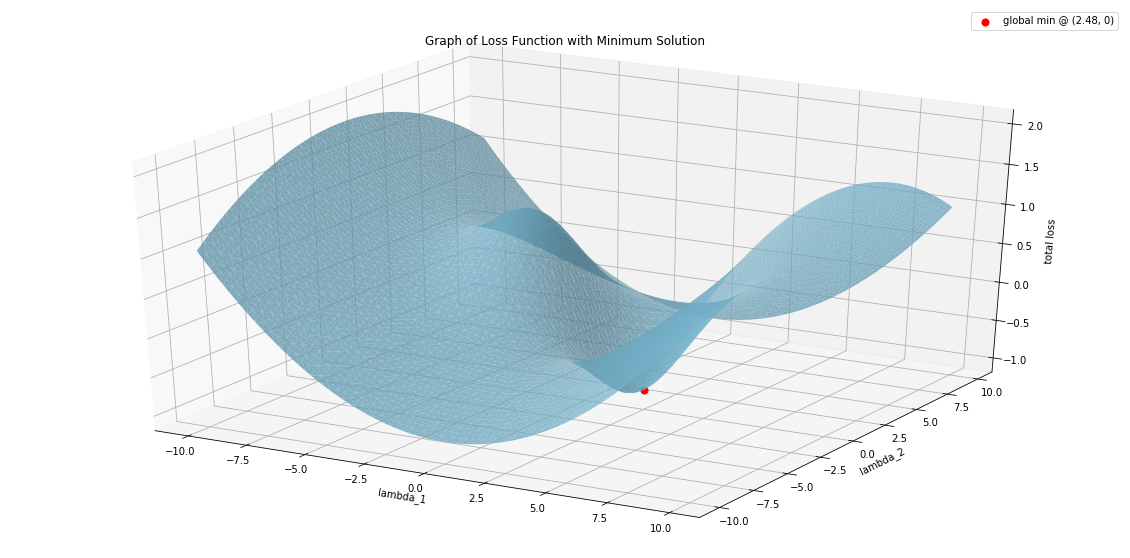

In [18]:
from mpl_toolkits.mplot3d import Axes3D
#cover the domain of the pdf with a grid and get the coordinates of the grid vertices
delta = 0.25
l1 = np.arange(-10, 10, delta)
l2 = np.arange(-10, 10, delta)
l1, l2 = np.meshgrid(l1, l2)

loss = L(l1, l2, x, y)

fig = plt.figure(figsize=(20, 10))

#plot 3D suface of pdf in R^3
ax2 = fig.add_subplot(111, projection='3d') 
ax2.plot_trisurf(l1.flatten(), l2.flatten(), loss.flatten(), linewidth=0.2, antialiased=True, color='skyblue', alpha=0.8)
ax2.scatter([2.48], [0], [L(2.48, 0, x, y)], color='red', s=50, label='global min @ (2.48, 0)')
ax2.set_xlabel('lambda_1')
ax2.set_ylabel('lambda_2')
ax2.set_zlabel('total loss')
ax2.set_title('Graph of Loss Function with Minimum Solution')
ax2.legend(loc='best')

plt.show()


In [19]:
Loss_function = lambda l1, l2:L(l1, l2, x, y)
init_value=[1,1]
optim_lambdas,grad_optim,history_GD,grad_norms_GD=gradient_descent(Loss_function, init_value, step_size=0.01, precision=1e-4, max_steps=1e6, history=True)
print("Lambdas found to minimize Loss Function",optim_lambdas)

Lambdas found to minimize Loss Function [2.47864462e+00 5.18422930e-04]


In [20]:
from AutoDiff import stochastic_gradient_descent as sgd

init_value=[1,1]
Loss_function_bis = lambda init_value,x ,y :L(init_value[0],init_value[1],x,y)
optim_lambdas,grad_optim,history_GD=sgd(Loss_function_bis, init_value,x ,y, step_size=0.1,batch_size=32,history=True)
print("Lambdas found to minimize Loss Function",optim_lambdas)

Epoch 0 out of 5
Epoch 1 out of 5
Epoch 2 out of 5
Epoch 3 out of 5
Epoch 4 out of 5
Lambdas found to minimize Loss Function [2.47891462 0.03643672]


## 8. Future Plans

**AutoDiff**: Our current implementation only utilize the forward mode. The future plan is to add the reverse mode functionality to the package to help with its application in neural network. The advantage of using reverse mode is that it can be more efficient as the number of variables increases (as mentioned in the background section as well).

**Root Finding Tool:** Root-Finder is an important tool that is used across many different applications, from physics, biology, finance, etc. Gradient Descent and Newton Method are some of the most commonly known algorithm that rely on the derivative to get the solution. Our current implementation already include these algorithm that illustrate the application of our package, and we would like to extend it by creating an interface showing the process of finding the solution/the roots (i.e. the flow or the steps taken from the initial point to the solution). This will also be a great for student's learning process in classrooms or elsewhere. Moreover, we could also add other methods (beside the 4 methods explained above) to find roots as part of the package

Additionally, we could also create an extended module for optimization methods, that may take in a customized optimizer or customized regularizer functions passed in by the user, and create visual interface for these methods as well (e.g. coefficients and corresponding labels, plot MSE over iterations)
